In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [4]:
ed=pd.read_csv('C:/Users/9/Downloads/event_data_train/event_data_train.csv')

In [5]:
ed.head(15)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [6]:
ed.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
ed['date'] = pd.to_datetime(ed.timestamp, unit ='s')

In [8]:
ed.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [9]:
ed.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [10]:
ed.date.min()

Timestamp('2015-06-15 04:00:48')

In [11]:
ed.date.max()

Timestamp('2018-05-19 23:33:31')

In [12]:
ed['day'] = ed.date.dt.date

In [13]:
ed.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


In [14]:
ed.groupby('day') \
    .user_id.nunique().head(15)

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
2015-06-20    294
2015-06-21    292
2015-06-22    516
2015-06-23    520
2015-06-24    471
2015-06-25    431
2015-06-26    392
2015-06-27    334
2015-06-28    345
2015-06-29    579
Name: user_id, dtype: int64

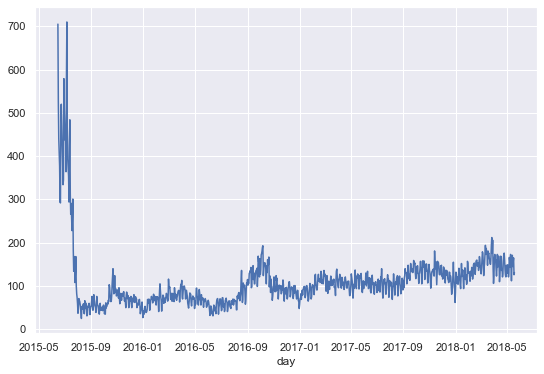

In [15]:
ed.groupby('day') \
    .user_id.nunique().plot()

In [16]:
ed[ed.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).head(10)

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
5,9,3
6,14,3
7,16,196
8,17,5
9,18,2


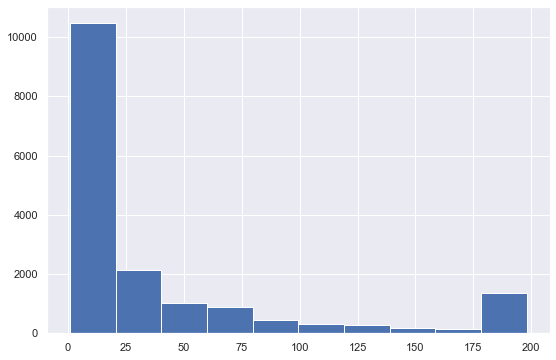

In [17]:
ed[ed.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

In [18]:
ed[ed.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.min()

1

In [19]:
ed.pivot_table(index='user_id',
               columns='action', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).head(10)

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
8,109,84,37,156
9,3,3,0,4
11,1,0,1,1
14,4,3,1,9


In [20]:
ed.pivot_table(index='user_id', 
               columns='action', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index().head(10)

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
5,8,109,84,37,156
6,9,3,3,0,4
7,11,1,0,1,1
8,14,4,3,1,9
9,16,196,196,108,651


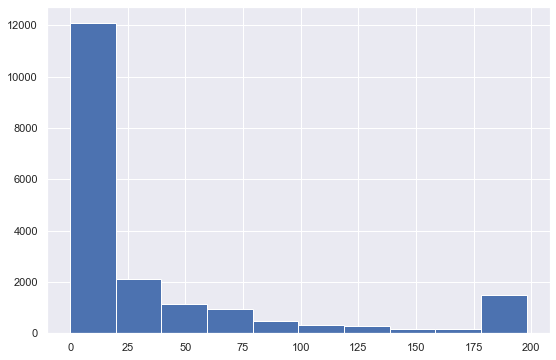

In [21]:
ed.pivot_table(index='user_id', 
               columns='action', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index().discovered.hist()

In [22]:
sd=pd.read_csv('C:/Users/9/Downloads/submissions_data_train/submissions_data_train.csv')

In [23]:
sd.head(10)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
5,31976,1434348188,correct,15853
6,31976,1478852055,correct,15853
7,31977,1434347371,correct,15853
8,31978,1434349981,correct,15853
9,31979,1434446091,correct,15853


In [24]:
sd['date'] = pd.to_datetime(sd.timestamp, unit ='s')

In [25]:
sd['day'] = sd.date.dt.date

In [26]:
sd.head(10)

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-16


In [27]:
us=sd.pivot_table(index='user_id', 
               columns='submission_status', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index()

In [28]:
us.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [29]:
ed[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).head(10)

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230
121,5681,2015-06-15,1434342656
128,19739,2015-06-15,1434342747
131,9244,2015-06-15,1434342783
149,6640,2015-06-15,1434342979
189,18272,2015-06-15,1434343275


In [30]:
ed[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [31]:
ed[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [32]:
gd=ed[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [33]:
np.concatenate(gd, axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [34]:
gd=pd.Series(np.concatenate(gd, axis=0))

In [35]:
gd

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [36]:
gd / (24*60*60)

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

In [37]:
gd = gd / (24*60*60)

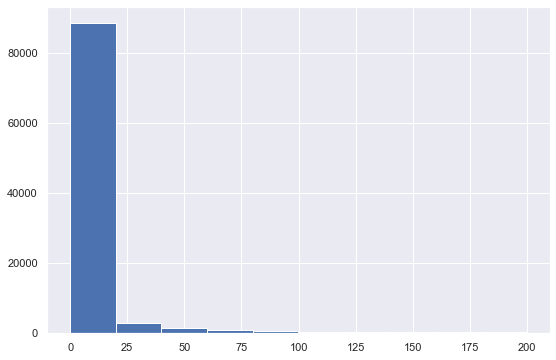

In [38]:
gd[gd < 200].hist()

In [39]:
gd.quantile(0.95)

59.760440972222156

In [40]:
ed['date'] = pd.to_datetime(ed.timestamp, unit="s")

In [41]:
ed['month'] = ed['date'].dt.month

In [42]:
ed['year'] = ed['date'].dt.year

In [43]:
ed.head(10)

,step_id,timestamp,action,user_id,date,day,month,year
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,6,2015
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,6,2015
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,6,2015
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,6,2015
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,6,2015
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15,6,2015
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15,6,2015
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15,6,2015
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15,6,2015
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15,6,2015


In [44]:
us.sort_values(['correct'], ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


In [45]:
ed.tail()

,step_id,timestamp,action,user_id,date,day,month,year
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,5,2018
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5,2018
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5,2018
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5,2018
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19,5,2018


In [46]:
ed.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).head(15)

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
5,8,1481466913
6,9,1484999497
7,11,1526140625
8,14,1436368676
9,16,1513162585


In [47]:
ud=ed.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [48]:
ud['is_gone_user'] = 1526772811 - ud.last_timestamp

In [49]:
ud.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151


In [50]:
now = 1526772811

In [51]:
dot = 30 * 24 * 60 * 60

In [52]:
dot

2592000

In [53]:
ud['is_gone_user'] = (now - ud.last_timestamp) > dot

In [54]:
ud.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [55]:
us.head(10)

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
5,16,77,106
6,17,0,2
7,22,76,47
8,25,1,4
9,26,7,16


In [56]:
ud = ud.merge(us, on='user_id', how='outer')

In [57]:
ud.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,NaN,NaN
7,11,1526140625,False,NaN,NaN
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [58]:
ud = ud.fillna(0)

In [59]:
ud.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [60]:
ued = ed.pivot_table(index='user_id', 
               columns='action', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index()

In [61]:
ued.head(10)

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
5,8,109,84,37,156
6,9,3,3,0,4
7,11,1,0,1,1
8,14,4,3,1,9
9,16,196,196,108,651


In [62]:
ud = ud.merge(ued, on='user_id', how='outer')

In [63]:
ud.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [64]:
u_days = ed.groupby('user_id').day.nunique()

In [65]:
u_days.head(10)

user_id
1      1
2      2
3      7
5      2
7      1
8      2
9      1
11     1
14     1
16    21
Name: day, dtype: int64

In [66]:
u_days = u_days.to_frame().reset_index()

In [67]:
u_days.head(10)

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
5,8,2
6,9,1
7,11,1
8,14,1
9,16,21


In [68]:
ud = ud.merge(u_days, on='user_id', how='outer')

In [69]:
ud.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
5,8,1481466913,True,9.0,21.0,109,84,37,156,2
6,9,1484999497,True,0.0,0.0,3,3,0,4,1
7,11,1526140625,False,0.0,0.0,1,0,1,1,1
8,14,1436368676,True,0.0,1.0,4,3,1,9,1
9,16,1513162585,True,77.0,106.0,196,196,108,651,21


In [70]:
ud.user_id.nunique()

19234

In [71]:
ed.user_id.nunique()

19234

In [72]:
ud['passed_course'] = ud.passed > 170

In [73]:
ud.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [74]:
ud.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [75]:
100 * 1425 / 17809

8.001572238755685

In [76]:
ud[ud.passed_course].day.median()

20.0

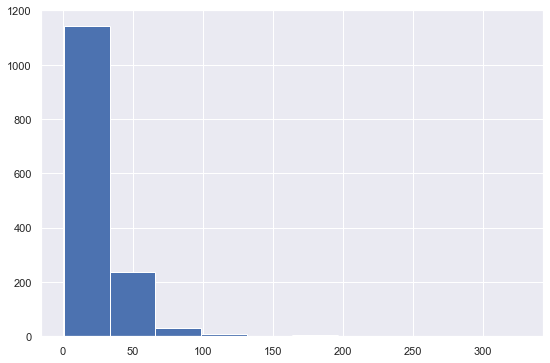

In [77]:
ud[ud.passed_course].day.hist()

In [78]:
user_min_time = ed.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [79]:
user_min_time.head(10)

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
5,8,1480603427
6,9,1484999434
7,11,1526140624
8,14,1436366155
9,16,1435674765


In [80]:
ud = ud.merge(user_min_time, how='outer')

In [81]:
ud.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
5,8,1481466913,True,9.0,21.0,109,84,37,156,2,False,1480603427
6,9,1484999497,True,0.0,0.0,3,3,0,4,1,False,1484999434
7,11,1526140625,False,0.0,0.0,1,0,1,1,1,False,1526140624
8,14,1436368676,True,0.0,1.0,4,3,1,9,1,False,1436366155
9,16,1513162585,True,77.0,106.0,196,196,108,651,21,True,1435674765


In [82]:
ed.head(10)

,step_id,timestamp,action,user_id,date,day,month,year
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,6,2015
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,6,2015
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,6,2015
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,6,2015
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,6,2015
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15,6,2015
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15,6,2015
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15,6,2015
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15,6,2015
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15,6,2015


In [83]:
ed_train = pd.DataFrame()

In [84]:
#for user_id in ud.user_id:
#    min_ut = ud[ud.user_id == user_id].min_timestamp.item()
#    time_treshold = min_ut + 3*24*60*60
#    
#    user_ed = ed[(ed.user_id == user_id) & (ed.timestamp < time_treshold)]
#    
#    ed_train = ed_train.append(user_ed)
# more 20 minutes

In [85]:
ed['user_time'] = ed.user_id.map(str) + '_' + ed.timestamp.map(str)

In [86]:
ed.head()

,step_id,timestamp,action,user_id,date,day,month,year,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895


In [87]:
time_treshold = 3*24*60*60

In [88]:
user_time_treshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + time_treshold).map(str)

In [89]:
user_time_treshold.head(10)

0     1_1473086664
1     2_1514642564
2     3_1434617676
3     5_1466416009
4     7_1521893860
5     8_1480862627
6     9_1485258634
7    11_1526399824
8    14_1436625355
9    16_1435933965
dtype: object

In [90]:
user_min_time['user_time_treshold'] = user_time_treshold

In [91]:
user_min_time

,user_id,min_timestamp,user_time_treshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860
...,...,...,...
19229,26790,1451484016,26790_1451743216
19230,26793,1510225031,26793_1510484231
19231,26794,1495287049,26794_1495546249
19232,26797,1508425316,26797_1508684516


In [92]:
ed = ed.merge(user_min_time[['user_id', 'user_time_treshold']], how='outer')

In [93]:
ed.head()

,step_id,timestamp,action,user_id,date,day,month,year,user_time,user_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895,17632_1434600048


In [94]:
ed.shape

(3480703, 10)

In [95]:
ed_train_new = ed[ed.user_time <= ed.user_time_treshold]

In [96]:
ed_train_new.head(10)

,step_id,timestamp,action,user_id,date,day,month,year,user_time,user_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,6,2015,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895,17632_1434600048
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15,6,2015,17632_1434340895,17632_1434600048
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15,6,2015,17632_1434340921,17632_1434600048
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15,6,2015,17632_1434340921,17632_1434600048
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15,6,2015,17632_1434340939,17632_1434600048
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15,6,2015,17632_1434340944,17632_1434600048


In [97]:
sd.head(10)

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-16


In [98]:
sd[sd.submission_status == 'wrong'].step_id.value_counts()

31978    16084
32031    13373
32202    13002
33481    10300
32075    10003
         ...  
33482      707
33681      703
33362      673
32175      342
32929       85
Name: step_id, Length: 76, dtype: int64

In [99]:
ed_train_new.groupby('user_id').day.nunique().max()

4

In [100]:
sd['user_time'] = sd.user_id.map(str) + '_' + sd.timestamp.map(str)
sd = sd.merge(user_min_time[['user_id', 'user_time_treshold']], how='outer')
sd_train = sd[sd.user_time <= sd.user_time_treshold]
sd_train.groupby('user_id').day.nunique().max()

4

In [101]:
X = sd_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day': 'days'})

In [102]:
X.head(10)

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
5,17,1
6,22,3
7,25,1
8,26,1
9,30,1


In [103]:
steps_tried = sd_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'steps_tried'})

In [104]:
steps_tried.head(10)

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
5,17,1
6,22,20
7,25,2
8,26,7
9,30,2


In [105]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [106]:
X.shape

(8913, 3)

In [107]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [108]:
sd_train.pivot_table(index='user_id', 
               columns='submission_status', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index().head(10)

submission_status,user_id,correct,wrong
0,2,2,0
1,3,4,4
2,8,9,21
3,14,0,1
4,16,23,27
5,17,0,2
6,22,20,11
7,25,1,4
8,26,7,16
9,30,2,0


In [109]:
X = X.merge(sd_train.pivot_table(index='user_id', 
               columns='submission_status', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index())

In [110]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [111]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [112]:
X.head(10)

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,23,27,0.460000
5,17,1,1,0,2,0.000000
6,22,3,20,20,11,0.645161
7,25,1,2,1,4,0.200000
8,26,1,7,7,16,0.304348
9,30,1,2,2,0,1.000000


In [113]:
X = X.merge(ed_train_new.pivot_table(index='user_id', 
               columns='action', 
               values='step_id', 
               aggfunc='count', 
               fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [114]:
X.head(10)

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.000000,9
1,3,1.0,4.0,4.0,4.0,0.500000,20
2,8,1.0,11.0,9.0,21.0,0.300000,154
3,14,1.0,1.0,0.0,1.0,0.000000,9
4,16,3.0,23.0,23.0,27.0,0.460000,132
5,17,1.0,1.0,0.0,2.0,0.000000,13
6,22,3.0,20.0,20.0,11.0,0.645161,93
7,25,1.0,2.0,1.0,4.0,0.200000,40
8,26,1.0,7.0,7.0,16.0,0.304348,32
9,30,1.0,2.0,2.0,0.0,1.000000,15


In [115]:
X = X.fillna(0)

In [116]:
X = X.merge(ud[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [117]:
X.head(10)

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.000000,9,False,True
1,3,1.0,4.0,4.0,4.0,0.500000,20,False,True
2,8,1.0,11.0,9.0,21.0,0.300000,154,False,True
3,14,1.0,1.0,0.0,1.0,0.000000,9,False,True
4,16,3.0,23.0,23.0,27.0,0.460000,132,True,True
5,17,1.0,1.0,0.0,2.0,0.000000,13,False,True
6,22,3.0,20.0,20.0,11.0,0.645161,93,True,True
7,25,1.0,2.0,1.0,4.0,0.200000,40,False,False
8,26,1.0,7.0,7.0,16.0,0.304348,32,False,True
9,30,1.0,2.0,2.0,0.0,1.000000,15,True,True


In [118]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [119]:
X.head(10)

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.000000,9,False,True
1,3,1.0,4.0,4.0,4.0,0.500000,20,False,True
2,8,1.0,11.0,9.0,21.0,0.300000,154,False,True
3,14,1.0,1.0,0.0,1.0,0.000000,9,False,True
4,16,3.0,23.0,23.0,27.0,0.460000,132,True,True
5,17,1.0,1.0,0.0,2.0,0.000000,13,False,True
6,22,3.0,20.0,20.0,11.0,0.645161,93,True,True
8,26,1.0,7.0,7.0,16.0,0.304348,32,False,True
9,30,1.0,2.0,2.0,0.0,1.000000,15,True,True
10,31,2.0,6.0,4.0,5.0,0.444444,34,False,True


In [120]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [121]:
y = X.passed_course.map(int)

In [122]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [123]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [124]:
X.head(10)

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.000000,9
3,1.0,4.0,4.0,4.0,0.500000,20
8,1.0,11.0,9.0,21.0,0.300000,154
14,1.0,1.0,0.0,1.0,0.000000,9
16,3.0,23.0,23.0,27.0,0.460000,132
17,1.0,1.0,0.0,2.0,0.000000,13
22,3.0,20.0,20.0,11.0,0.645161,93
26,1.0,7.0,7.0,16.0,0.304348,32
30,1.0,2.0,2.0,0.0,1.000000,15
